In [1]:
#IMPORTING NEEDED LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("Census_Income_Project.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# EDA (EXPLORATORY DATA ANALYSIS)

In [4]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


SKEWNESS AND OUTLIERS ARE PRESENT 

MEAN,MEADIAN AND MODE ARE NOR EQUAL IN ANY CASE SO NO NORMAL DISTRIBUTION

DEVIATION PRESENT

In [5]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

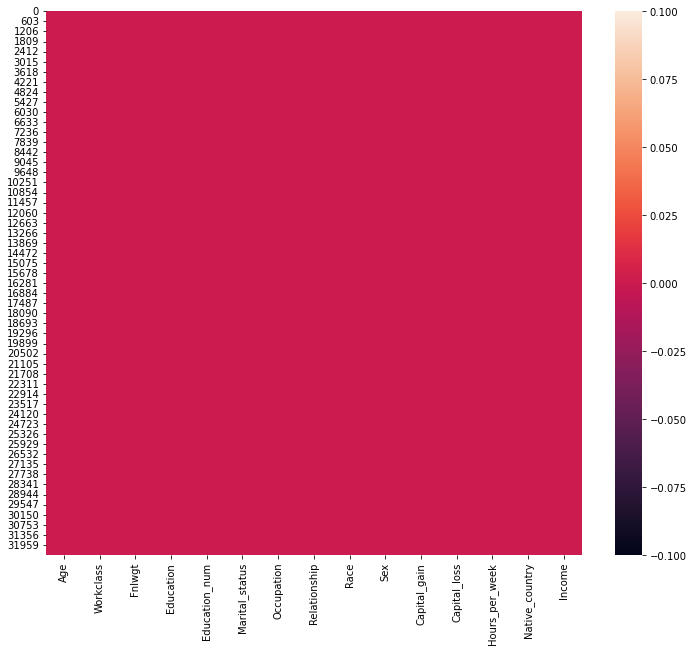

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull())

## NO NULL RECOREDS OR MISSING VALUE

In [8]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [9]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [10]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [11]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [12]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [13]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

<AxesSubplot:title={'center':'Education vs Income'}, xlabel='Education', ylabel='count'>

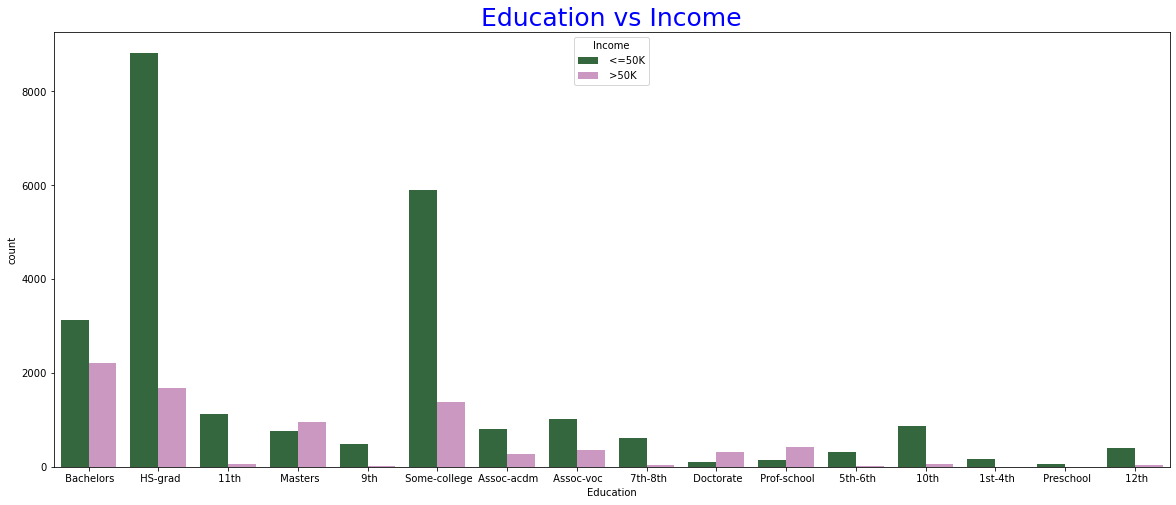

In [14]:
plt.figure(figsize=(20,8))

plt.title("Education vs Income",fontsize= 25,
        fontweight =200,
        color = 'blue',)

sns.countplot(data=df,x='Education',hue='Income',palette="cubehelix")

HIGHER THE EDUCATION HIGH WOULD BE SALARY.

SALARY ABOVE $50K IS HIGH FOR BACHELORS DEGREE QUALIFICATION.

SALARY UNDER $50K IS HIGH FOR HS-GRADE AND SEMICOLLEGE.

([<matplotlib.patches.Wedge at 0x7f781d951be0>,
 [Text(-0.6673064134972161, 0.9365907059679177, ' Self-emp-not-inc'),
  Text(-0.10051167438755519, -1.1455991459982025, ' Private'),
  Text(0.4046893694714646, -1.0764415981542095, ' State-gov'),
  Text(0.7743253718673131, -0.8502471514110161, ' Federal-gov'),
  Text(0.9923408292248291, -0.5811709547571856, ' Local-gov'),
  Text(1.09965668939836, -0.33653404799728553, ' ?'),
  Text(1.144629726854097, -0.1110080555721775, ' Self-emp-inc'),
  Text(1.1499958030882595, -0.0031069083329557643, ' Without-pay'),
  Text(1.1499997376652222, -0.0007767688976228629, ' Never-worked')],
 [Text(-0.3771731902375569, 0.5293773555470839, '69.71%'),
  Text(-0.05681094639296597, -0.6475125607815925, '7.80%'),
  Text(0.22873746970126257, -0.6084235120002053, '6.43%'),
  Text(0.43766216670761166, -0.48057447688448734, '5.64%'),
  Text(0.5608882947792512, -0.32848793094971357, '3.98%'),
  Text(0.6215450853121164, -0.19021489669411787, '3.43%'),
  Text(0.646964

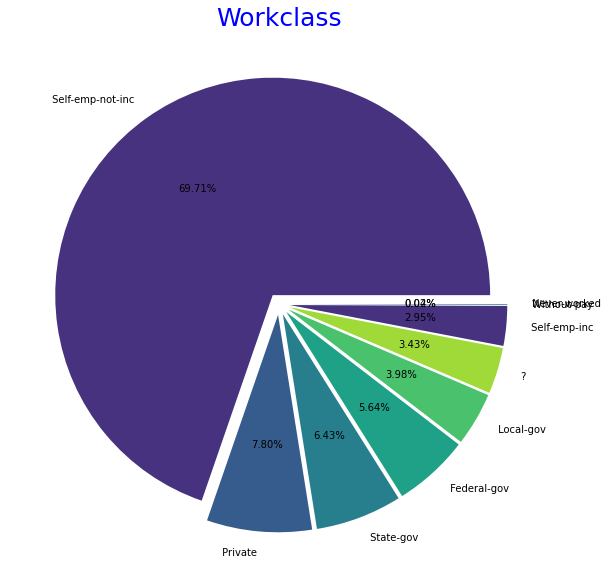

In [15]:
plt.figure(figsize=(20,10))


colors=sns.color_palette('viridis')
labels=df['Workclass'].dropna().unique()

plt.title('Workclass',fontsize= 25,
        fontweight =200,
        color = 'blue')
plt.pie(df['Workclass'].value_counts(),explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],
        labels=labels, 
        colors=colors, 
        autopct='%.2f%%')


self emp not inc are the highest in nos in workclass followed by private and state gov.

<AxesSubplot:title={'center':'Workclass vs Income'}, xlabel='Workclass', ylabel='count'>

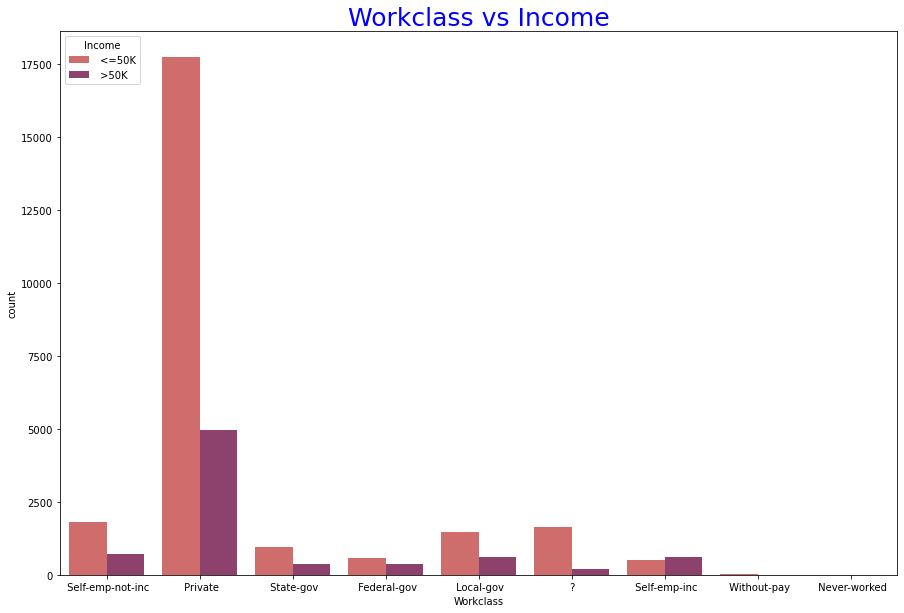

In [16]:
plt.figure(figsize=(15,10))

plt.title('Workclass vs Income',fontsize= 25,
        fontweight =200,
        color = 'blue',)



sns.countplot(x="Workclass", data=df,palette='flare',hue='Income')

PRIVATE WORKERS ARE HAVING SALARY HIGH ABOVE $50k and also high for under $50k

never worked dont ahve any salary

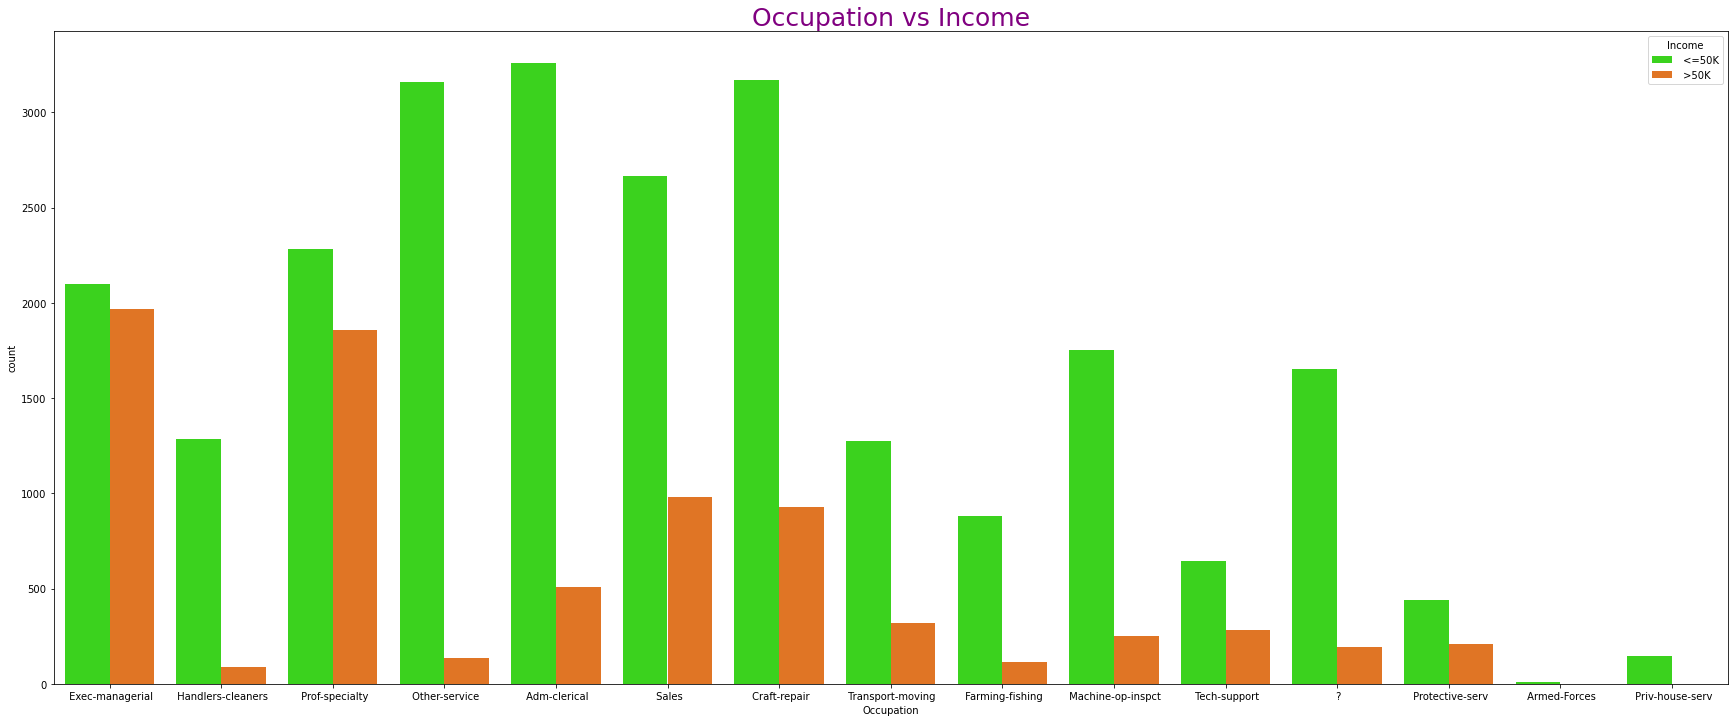

In [17]:
plt.figure(figsize=(30,12))
sns.countplot(data=df,x='Occupation',palette='gist_ncar',hue='Income')
plt.title('Occupation vs Income',fontsize= 25,
        fontweight =200,
        color = 'purple',)
plt.show()

SALARY ABOVE $50K IS HIGH FOR EXEC MANAGERIAL AND PROF-SPECIALITY

AND IS NULL FOR ARMED FORCES AND SERVANTS


HENCE SALARY ALSO DEPENDS UPON POST AND DEMAND ON PARTICULAR SECTOR

<AxesSubplot:xlabel='Income', ylabel='Count'>

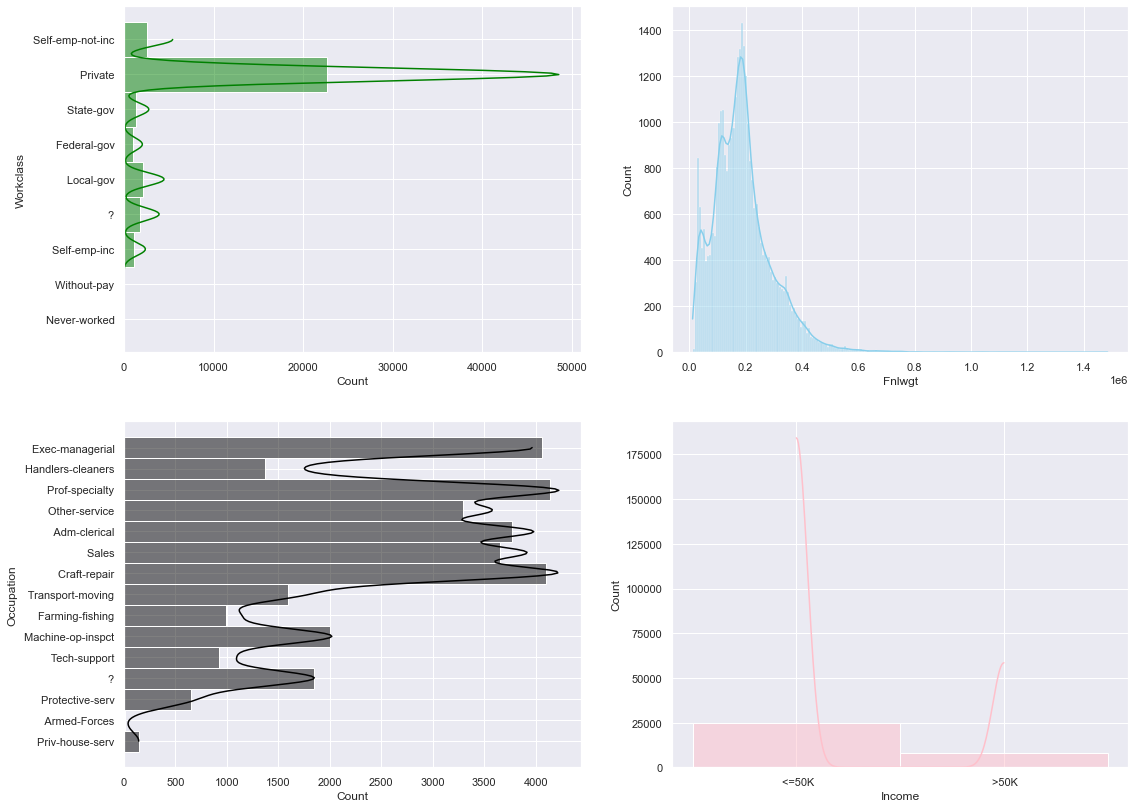

In [18]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(18, 14))

sns.histplot(data=df, y="Workclass", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="Fnlwgt", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, y="Occupation", kde=True, ax=axs[1, 0], color='black')
sns.histplot(data=df, x="Income", kde=True, ax=axs[1, 1] ,color='pink')

RIGHT SKEWNESS PRESENT IN FINAL WEIGHT

PRIVATE WORKCLASS ARE HIGH COMPARED TO OTHERS

INCOME ABOVE 50K ARE LESS THAN UNDER 50K.

<AxesSubplot:title={'center':'Relationship vs Income'}, xlabel='Relationship', ylabel='count'>

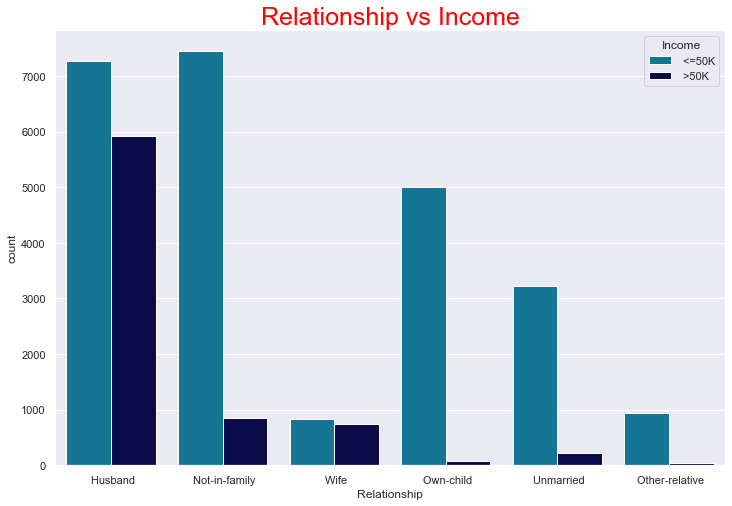

In [19]:

plt.figure(figsize=(12,8))

plt.title("Relationship vs Income",fontsize= 25,
        fontweight =200,
        color = 'red',)


sns.countplot(data=df,x='Relationship',hue='Income',palette='ocean_r')

HUSBAND ARE EARNING MORE THAN ANY.

MANY OWN CHILD ARE EARNING UNDER 50K

<AxesSubplot:title={'center':'Marital_status vs Income'}, xlabel='Marital_status', ylabel='count'>

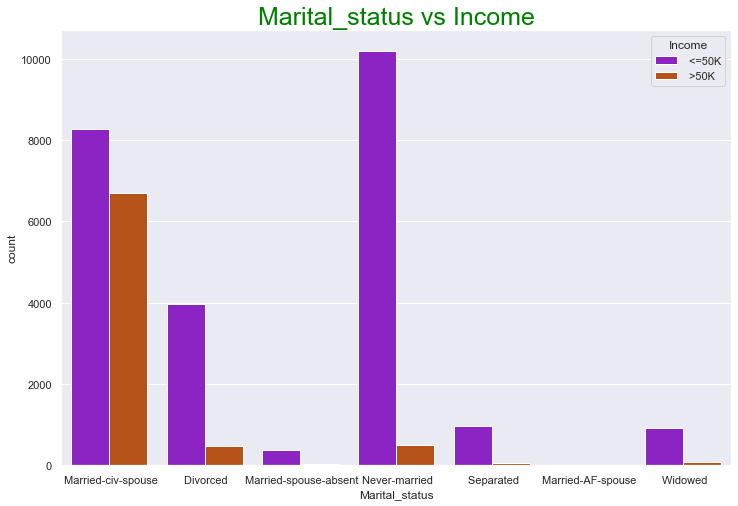

In [20]:
plt.figure(figsize=(12,8))

plt.title("Marital_status vs Income",fontsize= 25,
        fontweight =200,
        color = 'green',)


sns.countplot(data=df,x='Marital_status',hue='Income',palette="gnuplot")

MAJORITY ARE EARNING UNDER 50K WHO NEVER MARRIED BUT ARE HAPPY.

MARRIED CIV SPOUSE ARE HIGH IN EARNING IN BOTH THE CASES.

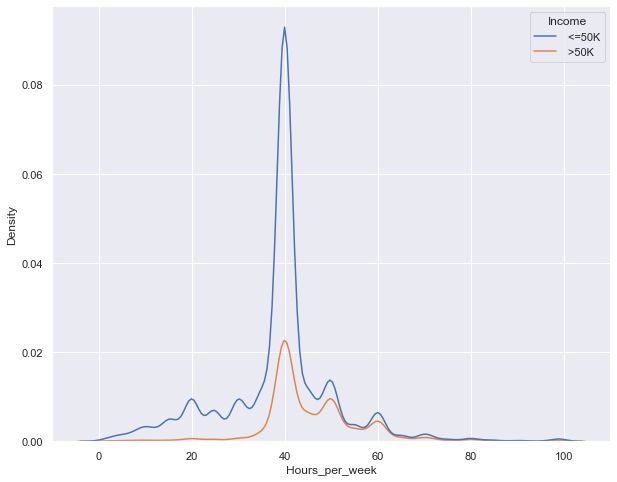

In [21]:
plt.figure(figsize=(10,8))
sns.kdeplot(data=df,x='Hours_per_week',hue='Income')
plt.show()

MAXIMUM 40 HOURS PER WEEK ARE HIGHEST IN NUMBER.

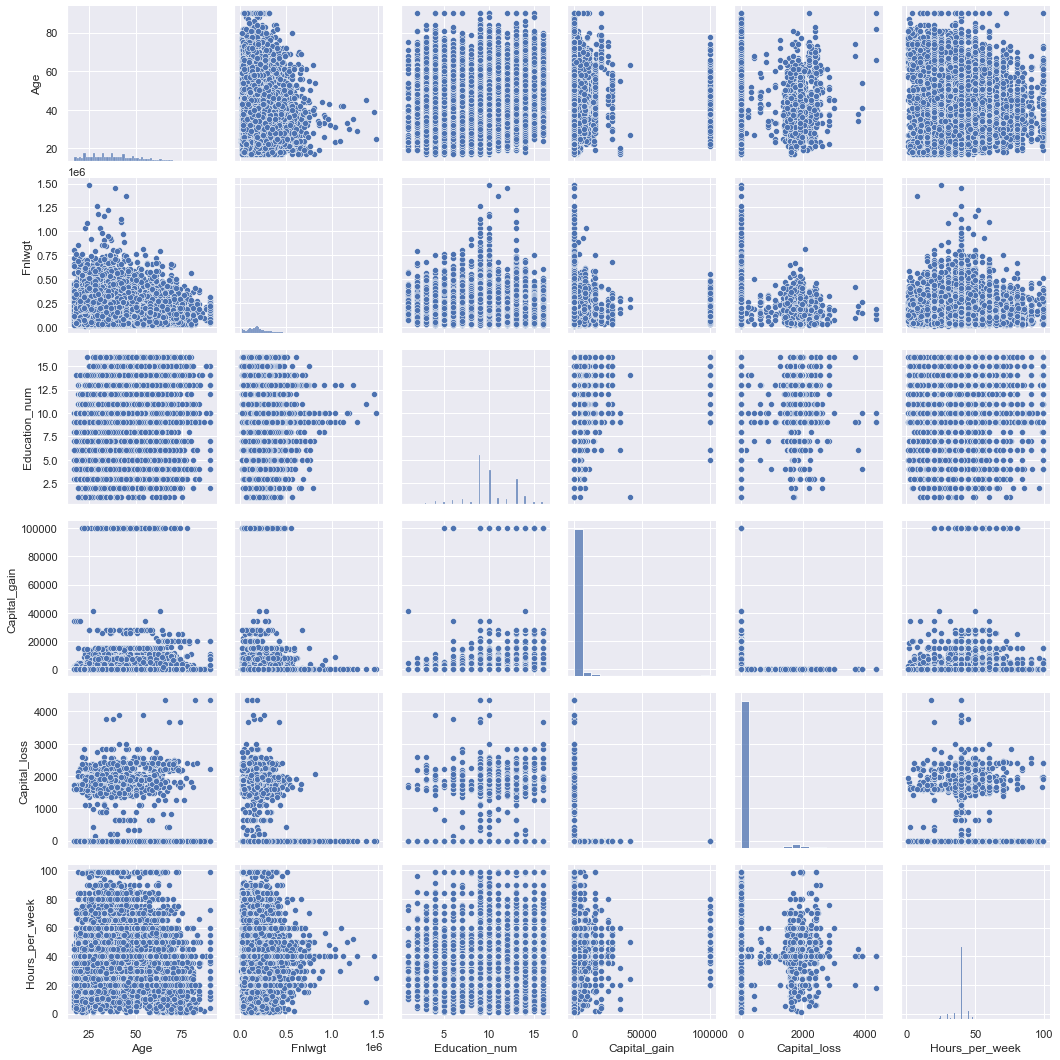

In [22]:
sns.pairplot(df)

20 TO 50 AGE ARE WOTKING FOR MORE HOURS THAN OLD AGE.

EDUCATION NUM ARE HAVING SOME OUTLIERS WITH RESPECT TO AGE.

CAPITAL LOSS ARE INVERSELY PROPOTIONAL TO CAPITAL GAIN.

In [23]:
Income = df[["Income"]]
Income = pd.get_dummies(Income, drop_first= True)

df = pd.concat([df, Income], axis = 1)
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Income_ >50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0


# Correlation

In [24]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income_ >50K
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690
Income_ >50K,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000


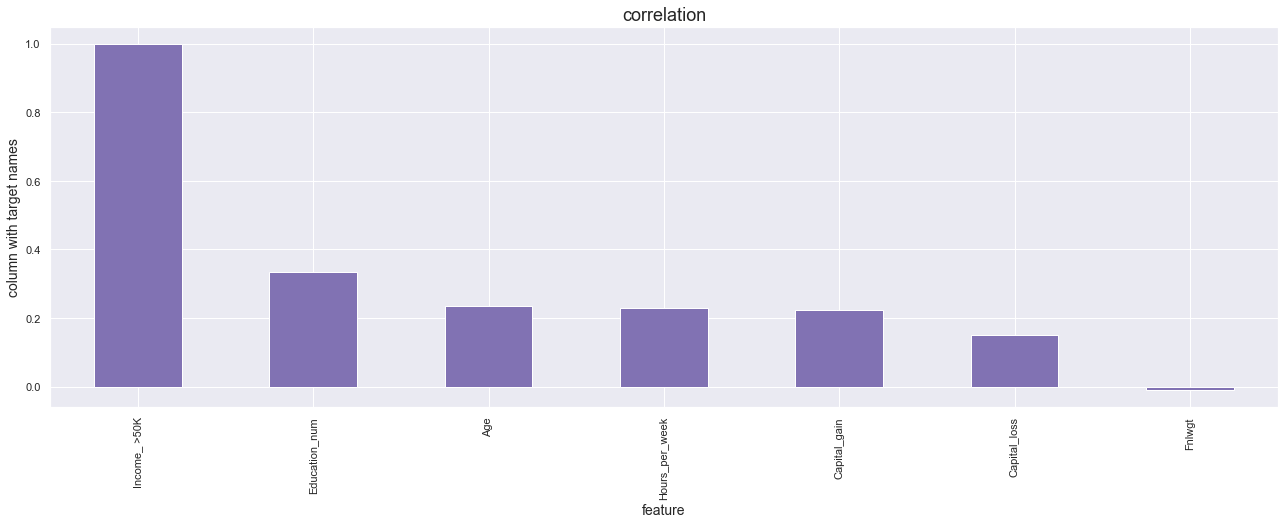

In [25]:
plt.figure(figsize=(22,7))
df.corr()['Income_ >50K'].sort_values(ascending=False).plot(kind='bar',color='m')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

ALL ARE POSITIVELY CORRELATED

<AxesSubplot:>

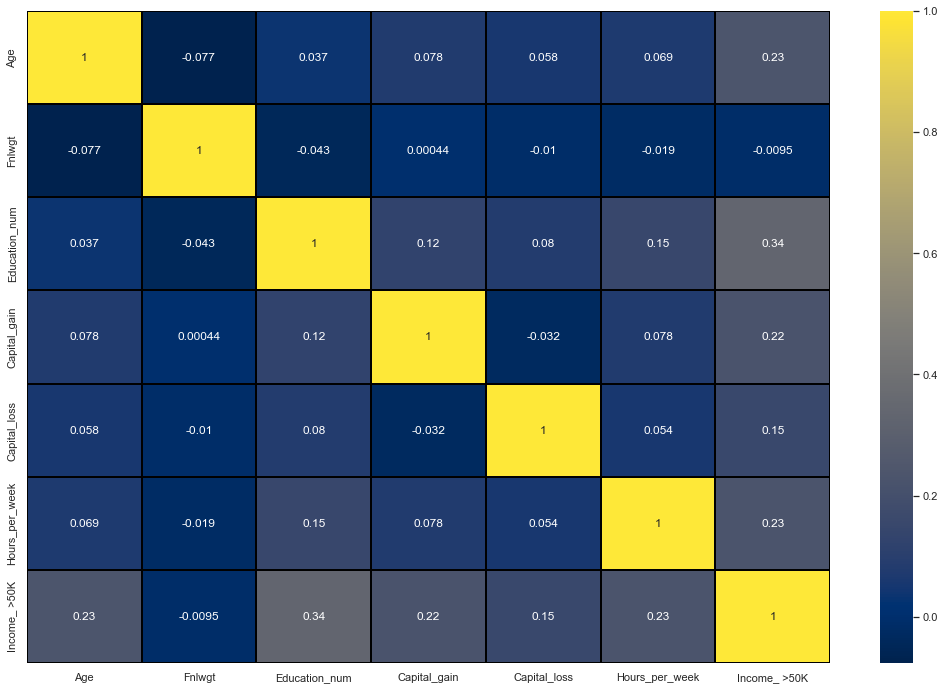

In [26]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),cmap='cividis',annot=True,linecolor='Black',linewidths=.2)

CAPITAL LOSS IS NEGATIVELY CORRELATED TO CAPITAL GAIN

HOURS PER WEEK IS DIRCTLY PROPOTIONAL TO INCOME ABOVE $50K.



# Handling Categorical Data
One can find many ways to handle categorical data. Some of them categorical data are,

Nominal data --> data are not in any order --> OneHotEncoder is used in this case

Ordinal data --> data are in order --> LabelEncoder is used in this case

In [27]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
Income_ >50K       uint8
dtype: object

In [28]:
# APLLYING LABEL ENCODER TO REST AS THEY ARE ORDINAL DATA

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [29]:
df['Marital_status'] = LE.fit_transform(df['Marital_status'])
df['Relationship'] = LE.fit_transform(df['Relationship'])
df['Race'] = LE.fit_transform(df['Race'])
df['Sex'] = LE.fit_transform(df['Sex'])
df['Workclass'] = LE.fit_transform(df['Workclass'])
df['Education'] = LE.fit_transform(df['Education'])
df['Occupation'] = LE.fit_transform(df['Occupation'])
df['Native_country'] = LE.fit_transform(df['Native_country'])

df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Income_ >50K
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,<=50K,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,<=50K,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,<=50K,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,<=50K,0


In [30]:
df.drop(["Income"], axis = 1, inplace = True)
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income_ >50K
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


**AS WE ONLY HAVE TO FIND SALARY ABOVE 50K, SO CONVERTED INTO ORDINAL DATA AND DROPPING INCOME.**

# CHECKING OUTLIERS

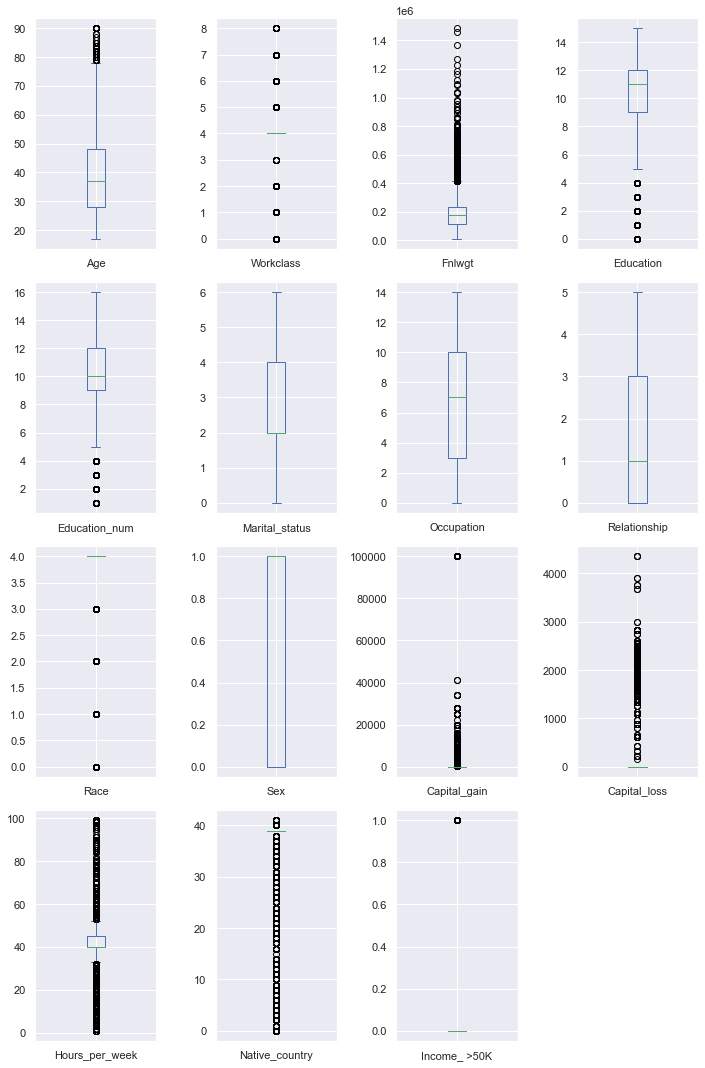

In [31]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(10,15))
plt.tight_layout()


MANY OUTLIERS PRESENT AND ALSO THE DATA IS IMBALANCED

# REMOVING OUTLIERS
BY ZSCORE

In [32]:
from scipy.stats import zscore

z=np.abs(zscore(df))
z

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income_ >50K
0,0.837097,1.463883,1.008742,0.335443,1.134779,0.406183,0.608434,0.900177,0.393675,0.703087,0.145914,0.216663,2.222120,0.291573,0.563210
1,0.042640,0.090121,0.245046,0.181319,0.420027,1.734026,0.135480,0.277810,0.393675,0.703087,0.145914,0.216663,0.035430,0.291573,0.563210
2,1.057031,0.090121,0.425770,2.402489,1.197429,0.406183,0.135480,0.900177,1.962583,0.703087,0.145914,0.216663,0.035430,0.291573,0.563210
3,0.775755,0.090121,1.408146,0.335443,1.134779,0.406183,0.810427,2.211658,1.962583,1.422298,0.145914,0.216663,0.035430,4.054157,0.563210
4,0.115952,0.090121,0.898170,0.439700,1.523480,0.406183,0.608434,2.211658,0.393675,1.422298,0.145914,0.216663,0.035430,0.291573,0.563210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.849066,0.090121,0.639710,0.852204,0.746077,0.406183,1.519858,2.211658,0.393675,1.422298,0.145914,0.216663,0.197407,0.291573,0.563210
32556,0.103982,0.090121,0.335466,0.181319,0.420027,0.406183,0.100997,0.900177,0.393675,0.703087,0.145914,0.216663,0.035430,0.291573,1.775537
32557,1.423589,0.090121,0.358811,0.181319,0.420027,2.249503,1.317864,1.589291,0.393675,1.422298,0.145914,0.216663,0.035430,0.291573,0.563210
32558,1.215624,0.090121,0.110927,0.181319,0.420027,0.921660,1.317864,0.966924,0.393675,0.703087,0.145914,0.216663,1.655200,0.291573,0.563210


In [33]:
threshold=4
print(np.where(z>4))

(array([    3,    13,    14, ..., 32524, 32530, 32550]), array([13, 13,  8, ..., 13, 12,  8]))


In [34]:
df1=df[(z<4).all(axis=1)]
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income_ >50K
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
5,49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


# Percentage loss

In [35]:
loss_percent=(32560-29813)/29813*100
print(loss_percent,'%')

9.214101231006607 %


# Separating Dataset

In [36]:
#independent column
x=df1.drop(['Income_ >50K'],axis=1)
#target
y=df1['Income_ >50K']

In [37]:
x.shape

(29813, 14)

In [38]:
y.shape

(29813,)

# Skewness check

In [39]:
df1.skew()

Age               0.572113
Workclass        -0.751895
Fnlwgt            0.827452
Education        -0.932218
Education_num    -0.320111
Marital_status   -0.041380
Occupation        0.125501
Relationship      0.754205
Race             -2.419071
Sex              -0.685742
Capital_gain      5.486593
Capital_loss      9.142411
Hours_per_week   -0.153363
Native_country   -4.474261
Income_ >50K      1.325470
dtype: float64

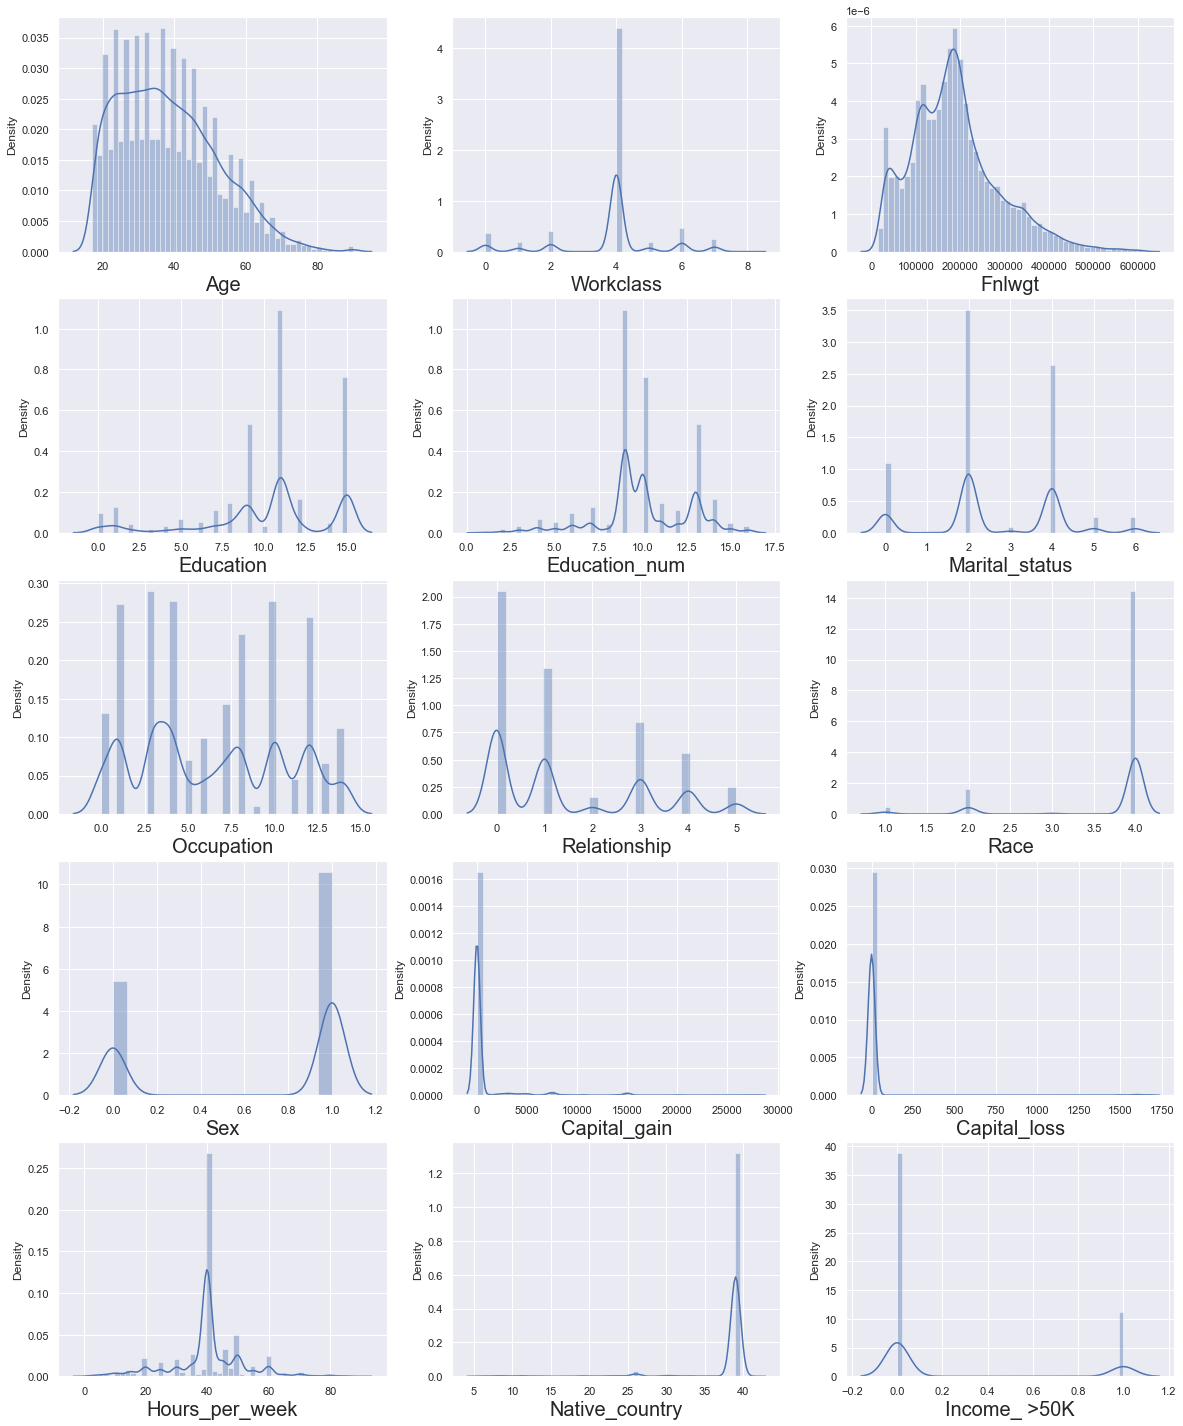

In [40]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df.columns:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

ALMOST ALL COLUMNS ARE HAVING SKEWNESS


In [41]:
from sklearn.preprocessing import power_transform
df1=power_transform(x,method='yeo-johnson')
df1

array([[ 0.90593161,  1.65171687, -1.11079074, ..., -0.11256037,
        -2.18216039,  0.27146261],
       [ 0.12520077,  0.01766949,  0.40180499, ..., -0.11256037,
        -0.02919743,  0.27146261],
       [ 1.07580553,  0.01766949,  0.57376159, ..., -0.11256037,
        -0.02919743,  0.27146261],
       ...,
       [ 1.34147427,  0.01766949, -0.2382343 , ..., -0.11256037,
        -0.02919743,  0.27146261],
       [-1.33480023,  0.01766949,  0.26908612, ..., -0.11256037,
        -1.66309449,  0.27146261],
       [ 1.02011472,  0.80107344,  1.01864178, ..., -0.11256037,
        -0.02919743,  0.27146261]])

# Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 8.51039777e-01,  1.47018188e+00, -1.05741097e+00, ...,
        -1.10057723e-01, -2.29062699e+00,  2.50241525e-01],
       [-2.58011161e-02,  9.51926277e-02,  2.76525118e-01, ...,
        -1.10057723e-01, -2.09818270e-03,  2.50241525e-01],
       [ 1.07025000e+00,  9.51926277e-02,  4.68801015e-01, ...,
        -1.10057723e-01, -2.09818270e-03,  2.50241525e-01],
       ...,
       [ 1.43560037e+00,  9.51926277e-02, -3.65933417e-01, ...,
        -1.10057723e-01, -2.09818270e-03,  2.50241525e-01],
       [-1.19492231e+00,  9.51926277e-02,  1.33832715e-01, ...,
        -1.10057723e-01, -1.69730471e+00,  2.50241525e-01],
       [ 9.97179926e-01,  7.82687252e-01,  1.00511721e+00, ...,
        -1.10057723e-01, -2.09818270e-03,  2.50241525e-01]])

# SMOTE FOR BALANCING DATA

In [43]:
#SMOTE(synthetic Minority over sampling technique)
#It's use for Balancing the dataset

from imblearn.over_sampling import SMOTE
sm=SMOTE()

x_train,y_train=sm.fit_resample(x,y)
y_train

0        0
1        0
2        0
3        0
4        0
        ..
46277    1
46278    1
46279    1
46280    1
46281    1
Name: Income_ >50K, Length: 46282, dtype: uint8

In [44]:
y_train.value_counts()

0    23141
1    23141
Name: Income_ >50K, dtype: int64

<AxesSubplot:xlabel='Income_ >50K', ylabel='count'>

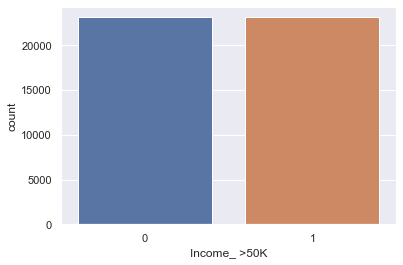

In [45]:
sns.countplot(y_train)

# Splitting the DataFrame and Model selection

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=141)

# 1)LOGISTIC REGRESSION 

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

lo=LogisticRegression()
lo.fit(x_train,y_train)
lo.score(x_train,y_train)
predlo=lo.predict(x_test)


print('Accuracy Score is''\n',accuracy_score(y_test,predlo))
print('Confusion Matrix''\n',confusion_matrix(y_test,predlo))
print(classification_report(y_test,predlo))

Accuracy Score is
 0.839304772068913
Confusion Matrix
 [[4902  233]
 [ 821  603]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5135
           1       0.72      0.42      0.53      1424

    accuracy                           0.84      6559
   macro avg       0.79      0.69      0.72      6559
weighted avg       0.83      0.84      0.82      6559



### CROSS VALIDATION

In [48]:
test_accuracy= accuracy_score(y_test,predlo)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lo,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 82.93362651831488 and Accuracy score is 83.9304772068913
At cross fold 3 the Cross Val score is 82.90343675114987 and Accuracy score is 83.9304772068913
At cross fold 4 the Cross Val score is 82.92020748861724 and Accuracy score is 83.9304772068913
At cross fold 5 the Cross Val score is 82.89001959584945 and Accuracy score is 83.9304772068913
At cross fold 6 the Cross Val score is 82.90343433096254 and Accuracy score is 83.9304772068913
At cross fold 7 the Cross Val score is 82.91013987186798 and Accuracy score is 83.9304772068913
At cross fold 8 the Cross Val score is 82.89337962764934 and Accuracy score is 83.9304772068913
At cross fold 9 the Cross Val score is 82.87996897823908 and Accuracy score is 83.9304772068913


**Logistic Regression IS HAVING GOOD RESULTS**
###### WE WILL FIRST CHECK OTHER MODEL RESULTS AND THEN CONCLUDE


# 2) DecisionTreeClassifier

In [49]:

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_dt))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_dt))
print('Classification Report''\n',classification_report(y_test,pred_dt))

Accuracy score
 0.8054581491080958
Confusion Matrix
 [[4474  661]
 [ 615  809]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      5135
           1       0.55      0.57      0.56      1424

    accuracy                           0.81      6559
   macro avg       0.71      0.72      0.72      6559
weighted avg       0.81      0.81      0.81      6559



### CROSS VALIDATION

In [50]:
test_accuracy= accuracy_score(y_test,pred_dt)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(dt,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 80.07915996302168 and Accuracy score is 80.54581491080958
At cross fold 3 the Cross Val score is 80.47162205411905 and Accuracy score is 80.54581491080958
At cross fold 4 the Cross Val score is 80.60576671315182 and Accuracy score is 80.54581491080958
At cross fold 5 the Cross Val score is 80.52191409813722 and Accuracy score is 80.54581491080958
At cross fold 6 the Cross Val score is 80.43134611186241 and Accuracy score is 80.54581491080958
At cross fold 7 the Cross Val score is 80.58900479656526 and Accuracy score is 80.54581491080958
At cross fold 8 the Cross Val score is 80.4447426052449 and Accuracy score is 80.54581491080958
At cross fold 9 the Cross Val score is 80.57894602323773 and Accuracy score is 80.54581491080958


**DecisionTreeClassifier IS HAVING GOOD RESULTS**
###### WE WILL FIRST CHECK OTHER MODEL RESULTS AND THEN CONCLUDE

# 3) RandomForestClassifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_rfc))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_rfc))
print('Classification Report''\n',classification_report(y_test,pred_rfc))

Accuracy score
 0.8511968287848758
Confusion Matrix
 [[4754  381]
 [ 595  829]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      5135
           1       0.69      0.58      0.63      1424

    accuracy                           0.85      6559
   macro avg       0.79      0.75      0.77      6559
weighted avg       0.84      0.85      0.85      6559



### CROSS VALIDATION

In [52]:
test_accuracy= accuracy_score(y_test,pred_rfc)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(rfc,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 85.0904038780769 and Accuracy score is 85.11968287848758
At cross fold 3 the Cross Val score is 85.36545413538713 and Accuracy score is 85.11968287848758
At cross fold 4 the Cross Val score is 85.31513970870708 and Accuracy score is 85.11968287848758
At cross fold 5 the Cross Val score is 85.38224001604888 and Accuracy score is 85.11968287848758
At cross fold 6 the Cross Val score is 85.39563112013757 and Accuracy score is 85.11968287848758
At cross fold 7 the Cross Val score is 85.34196491463454 and Accuracy score is 85.11968287848758
At cross fold 8 the Cross Val score is 85.28831908167194 and Accuracy score is 85.11968287848758
At cross fold 9 the Cross Val score is 85.41914758124398 and Accuracy score is 85.11968287848758


**RandomForestClassifier IS HAVING GOOD RESULTS**
###### WE WILL FIRST CHECK OTHER MODEL RESULTS AND THEN CONCLUDE

# 4) SUPPORT VECTOR CLASSIFIER

In [53]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_svc))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_svc))
print('Classification Report''\n',classification_report(y_test,pred_svc))

Accuracy score
 0.8550083854246074
Confusion Matrix
 [[4897  238]
 [ 713  711]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      5135
           1       0.75      0.50      0.60      1424

    accuracy                           0.86      6559
   macro avg       0.81      0.73      0.76      6559
weighted avg       0.85      0.86      0.84      6559



### CROSS VALIDATION

In [54]:
test_accuracy= accuracy_score(y_test,pred_svc)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(svc,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 84.86231568503469 and Accuracy score is 85.50083854246074
At cross fold 3 the Cross Val score is 85.01661696297866 and Accuracy score is 85.50083854246074
At cross fold 4 the Cross Val score is 85.03674048093389 and Accuracy score is 85.50083854246074
At cross fold 5 the Cross Val score is 84.99650056034352 and Accuracy score is 85.50083854246074
At cross fold 6 the Cross Val score is 84.97299939712099 and Accuracy score is 85.50083854246074
At cross fold 7 the Cross Val score is 84.97970683929829 and Accuracy score is 85.50083854246074
At cross fold 8 the Cross Val score is 84.97973921569559 and Accuracy score is 85.50083854246074
At cross fold 9 the Cross Val score is 84.9897974666399 and Accuracy score is 85.50083854246074


**SUPPORT VECTOR CLASSIFIER IS HAVING GOOD RESULTS**
###### WE WILL FIRST CHECK OTHER MODEL RESULTS AND THEN CONCLUDE

# 5) GradientBoostingClassifier

In [55]:

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
pred_gbk = gbk.predict(x_test)
print('Accuracy score''\n',accuracy_score(pred_gbk,y_test))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_gbk))
print('Classification Report''\n',classification_report(y_test,pred_gbk))


Accuracy score
 0.870254611983534
Confusion Matrix
 [[4888  247]
 [ 604  820]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      5135
           1       0.77      0.58      0.66      1424

    accuracy                           0.87      6559
   macro avg       0.83      0.76      0.79      6559
weighted avg       0.86      0.87      0.86      6559



### CROSS VALIDATION

In [56]:
test_accuracy= accuracy_score(y_test,pred_gbk)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(gbk,x,y,cv=i,n_jobs=5)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 86.33817966935948 and Accuracy score is 87.0254611983534
At cross fold 3 the Cross Val score is 86.27109932576573 and Accuracy score is 87.0254611983534
At cross fold 4 the Cross Val score is 86.26438722640415 and Accuracy score is 87.0254611983534
At cross fold 5 the Cross Val score is 86.36167582232893 and Accuracy score is 87.0254611983534
At cross fold 6 the Cross Val score is 86.32140176231658 and Accuracy score is 87.0254611983534
At cross fold 7 the Cross Val score is 86.2610270687284 and Accuracy score is 87.0254611983534
At cross fold 8 the Cross Val score is 86.29459378048307 and Accuracy score is 87.0254611983534
At cross fold 9 the Cross Val score is 86.32143798588459 and Accuracy score is 87.0254611983534


**GradientBoostingClassifier IS HAVING GOOD RESULTS**
###### WE WILL FIRST CHECK OTHER MODEL RESULTS AND THEN CONCLUDE

# 6) ExtraTreesClassifier

In [57]:
from sklearn.ensemble import ExtraTreesClassifier

ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
pred_ETC=ETC.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_ETC))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_ETC))
print('Classification Report''\n',classification_report(y_test,pred_ETC))



Accuracy score
 0.8457081872236621
Confusion Matrix
 [[4721  414]
 [ 598  826]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.92      0.90      5135
           1       0.67      0.58      0.62      1424

    accuracy                           0.85      6559
   macro avg       0.78      0.75      0.76      6559
weighted avg       0.84      0.85      0.84      6559



### CROSS VALIDATION

In [58]:
test_accuracy= accuracy_score(y_test,pred_ETC)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(ETC,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 84.33569786597023 and Accuracy score is 84.57081872236621
At cross fold 3 the Cross Val score is 84.73485494335789 and Accuracy score is 84.57081872236621
At cross fold 4 the Cross Val score is 84.54030509626716 and Accuracy score is 84.57081872236621
At cross fold 5 the Cross Val score is 84.56379531093651 and Accuracy score is 84.57081872236621
At cross fold 6 the Cross Val score is 84.50341729566037 and Accuracy score is 84.57081872236621
At cross fold 7 the Cross Val score is 84.53694696944284 and Accuracy score is 84.57081872236621
At cross fold 8 the Cross Val score is 84.29211149550487 and Accuracy score is 84.57081872236621
At cross fold 9 the Cross Val score is 84.59734007072774 and Accuracy score is 84.57081872236621


**ExtraTreesClassifier IS HAVING GOOD RESULTS**
###### WE WILL FIRST CHECK OTHER MODEL RESULTS AND THEN CONCLUDE

# 7)KNeighborsClassifier

In [59]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
pred_knc=knc.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_knc))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_knc))
print('Classification Report''\n',classification_report(y_test,pred_knc))

Accuracy score
 0.8362555267571277
Confusion Matrix
 [[4662  473]
 [ 601  823]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      5135
           1       0.64      0.58      0.61      1424

    accuracy                           0.84      6559
   macro avg       0.76      0.74      0.75      6559
weighted avg       0.83      0.84      0.83      6559



### CROSS VALIDATION

In [60]:
test_accuracy= accuracy_score(y_test,pred_knc)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(knc,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 83.35290906127044 and Accuracy score is 83.62555267571277
At cross fold 3 the Cross Val score is 83.57765345841949 and Accuracy score is 83.62555267571277
At cross fold 4 the Cross Val score is 83.74871131427277 and Accuracy score is 83.62555267571277
At cross fold 5 the Cross Val score is 83.55083565471362 and Accuracy score is 83.62555267571277
At cross fold 6 the Cross Val score is 83.69167961057968 and Accuracy score is 83.62555267571277
At cross fold 7 the Cross Val score is 83.65142722973201 and Accuracy score is 83.62555267571277
At cross fold 8 the Cross Val score is 83.70513239837365 and Accuracy score is 83.62555267571277
At cross fold 9 the Cross Val score is 83.65484366066175 and Accuracy score is 83.62555267571277


**KNeighborsClassifier IS HAVING GOOD RESULTS**
###### WE WILL FIRST CHECK OTHER MODEL RESULTS AND THEN CONCLUDE


#### HENCE ALL MODELS ARE SHOWING VERY GOOD RESULTS GRADIENTBOOSTINGCLASSIFIER IS SHOWING HIGHEST ACCURACY SCORE

##### PERFORMING GRADIENTBOOSTINGCLASSIFIER 
# Hyper parameter tuning

In [62]:
from sklearn.model_selection import GridSearchCV

#creating the parameter list to pass in GrideSearchcv
parameters={'max_features':['auto','sqrt'],
           'max_depth':[4,5]}

gcv=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5,scoring="accuracy")
gcv.fit(x_train,y_train)
gcv.best_params_

{'max_depth': 5, 'max_features': 'auto'}

In [63]:
gcv_pred=gcv.best_estimator_.predict(x_test)#predicting with best parameters
accuracy_score(y_test,gcv_pred)#checking the final score

print('Accuracy score''\n',accuracy_score(y_test,gcv_pred))
print('Confusion Matrix''\n',confusion_matrix(y_test,gcv_pred))
print('Classification Report''\n',classification_report(y_test,gcv_pred))

Accuracy score
 0.8714743101082482
Confusion Matrix
 [[4841  294]
 [ 549  875]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      5135
           1       0.75      0.61      0.67      1424

    accuracy                           0.87      6559
   macro avg       0.82      0.78      0.80      6559
weighted avg       0.87      0.87      0.87      6559



## FINALLY WE SEE GRADIENT BOOSTING CLASSIFIER IS DOING THE BEST JOB

# ROC AUC plot

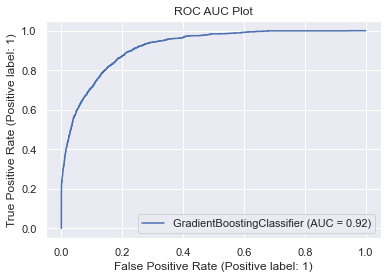

In [64]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(gcv.best_estimator_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

**accuracy score=87.14% and auc=92%**


## Final Prediction Submission

In [65]:
import numpy as np
a = np.array(y_test)
predicted = np.array(gcv.best_estimator_.predict(x_test))
df = pd.DataFrame(zip(a,predicted), columns = ["Original","Predicted"])
df

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
6554,0,1
6555,0,0
6556,1,1
6557,1,1


# Saving the best Model

In [66]:
# save the model to disk
import pickle
filename = 'census_income_project.pkl'
pickle.dump(gcv.best_estimator_, open(filename, 'wb'))

In [67]:
# load the model from disk

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.8714743101082482
